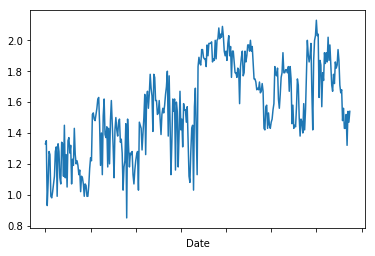

In [6]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Gurkirat Singh\Documents\avocado-prices\avocado.csv")

albany_df = df[df['region']=="Albany"]
albany_df.set_index("Date", inplace=True)

albany_df["AveragePrice"].plot()

In [7]:
# Pandas comes built in with ways to handle for dates. First, we need to convert the date column to datetime objects:
df['Date'] = pd.to_datetime(df['Date'])

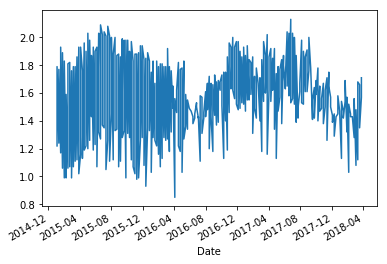

In [8]:
# we need to convert the date column to datetime objects:
albany_df = df[df['region']=="Albany"]
albany_df.set_index("Date", inplace=True)

albany_df["AveragePrice"].plot()

In [9]:
# We could smooth the data with a rolling average.
albany_df = df.copy()[df['region']=="Albany"]
albany_df.set_index('Date', inplace=True)
albany_df["price25ma"] = albany_df["AveragePrice"].rolling(25).mean()

In [10]:
graph_df = pd.DataFrame()

for region in df['region'].unique()[:16]:
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]  # note the double square brackets!
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


In [12]:
#Our avocados have multiple prices: Organic and Conventional! So, let's pick one. I'll go with organic.
df = df.copy()[df['type']=='organic']

df["Date"] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", ascending=True, inplace=True)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9489,51,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
11205,51,2015-01-04,1.39,4414.29,56.21,2760.82,0.00,1597.26,1139.42,457.84,0.0,organic,2015,Roanoke
9801,51,2015-01-04,1.42,22480.07,3199.35,6916.72,7.56,12356.44,1076.67,11279.77,0.0,organic,2015,Denver
11309,51,2015-01-04,1.23,19089.36,17522.46,735.22,2.87,828.81,828.81,0.00,0.0,organic,2015,SanDiego
9957,51,2015-01-04,1.54,61615.10,3633.93,42963.06,0.00,15018.11,9763.55,5254.56,0.0,organic,2015,GreatLakes


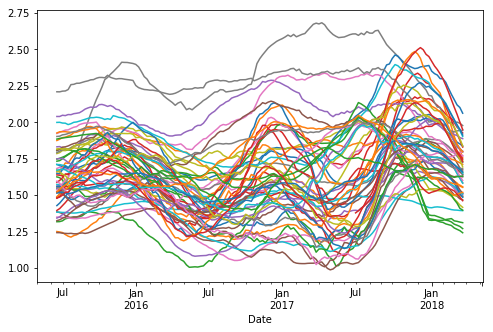

In [13]:
#Let's go for Final output.
graph_df = pd.DataFrame()

for region in df['region'].unique():
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]  # note the double square brackets! (so df rather than series)
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])

graph_df.plot(figsize=(8,5), legend=False)